# Synapses

- Synaptic filter
- PSC after 1 spike
- PSC after many spikes
- PSC during constant firing

In [27]:
# Set up the path so it can find my modules
import os
import sys
if os.name=='nt':
    sys.path.append('C:\\Users\\jorch\\Dropbox\\teaching\\cs489_neural_nets\\lib')
else:
    sys.path.append('/Users/jorchard/Dropbox/teaching/cs489_neural_nets/lib')

In [33]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
import jonef
#%matplotlib notebook
%matplotlib inline

## Synaptic Filter

In [34]:
def SynapticFilter(t, offset=0., tau_s=0.05, n=0):
    if t<offset:
        return 0.
    else:
        return (t-offset)**n*np.exp(-(t-offset)/tau_s)

In [35]:
plt.figure(1), plt.show()

(<matplotlib.figure.Figure at 0x228cdc61470>, None)

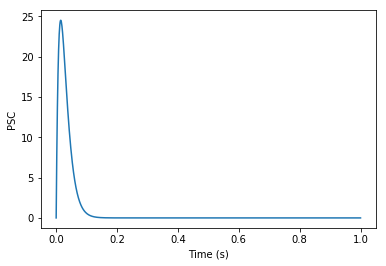

In [37]:
# Try tau_s values of 0.005, 0.03, 0.1
tau_s = 0.0150
t = np.linspace(0, 1, 1000)
dt = t[1]-t[0]
s = np.array([SynapticFilter(tt, tau_s=tau_s, offset=0.0, n=1) for tt in t])
s = s / sum(s) / dt
plt.figure(1)
plt.plot(t,s), plt.xlabel('Time (s)'), plt.ylabel('PSC');

## One Spike

In [38]:
def DemoSpikeTrain(P, T):
    if P==1:
        A = np.random.rand(1)*T/2
    elif P<50:
        A = np.random.rand(P)*T
    else:
        A = np.linspace(0.0, T, P)
    return A

In [39]:
T = 1
dt = 0.001
t2 = np.arange(0.0, T, dt)

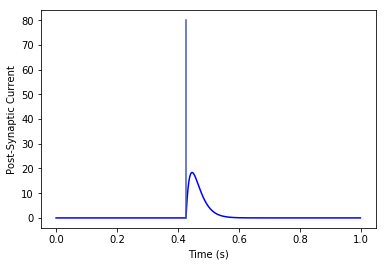

In [40]:
P = 1   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = jonef.Spikes2PSC(t2, A, 0.02, 1)
%matplotlib inline
plt.figure()
plt.plot(t2,p2,'b'), plt.xlabel('Time (s)'), plt.ylabel('Post-Synaptic Current')
jonef.PlotSpikeRaster([A], y_range=[0, 80]), plt.axis('auto');

## Many Spikes

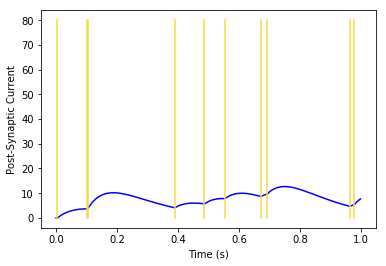

In [42]:
P=10   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = jonef.Spikes2PSC(t2, A, 0.1, 1) # try changing tau_s (0.01, or 0.1)
plt.figure()
plt.plot(t2,p2,'b'), plt.xlabel('Time (s)'), plt.ylabel('Post-Synaptic Current')
jonef.PlotSpikeRaster([A], y_range=[0, 80]), plt.axis('auto');

## Constant Firing

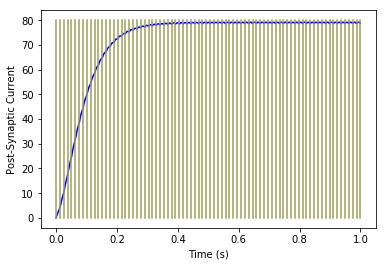

In [46]:
P=80   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = jonef.Spikes2PSC(t2, A, 0.05, 1)
plt.figure()
plt.plot(t2,p2,'b'), plt.xlabel('Time (s)'), plt.ylabel('Post-Synaptic Current')
jonef.PlotSpikeRaster([A], y_range=[0, 80]), plt.axis('auto');